# Semi-serious and slightly useless HP analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

## 1. Load CSV file

In [7]:
df = pd.read_csv("dwh/hp_characters.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         404 non-null    object 
 1   ancestry     105 non-null    object 
 2   house        135 non-null    object 
 3   role         404 non-null    object 
 4   wand_length  24 non-null     float64
dtypes: float64(1), object(4)
memory usage: 15.9+ KB


## 2. Calculate distribution of Characters in Hogwarts Houses

In [11]:
houses = df.groupby("house").size()
print(houses)

house
Gryffindor    47
Hufflepuff    19
Ravenclaw     23
Slytherin     46
dtype: int64


## 3. Make a cool pie chart

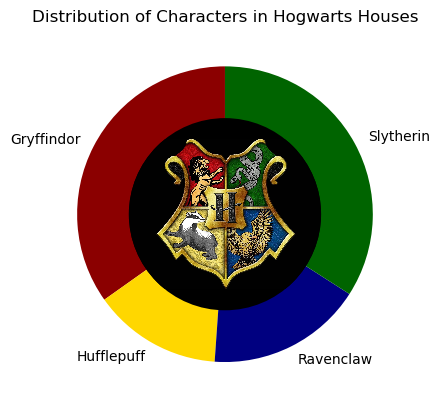

In [14]:
fig, ax = plt.subplots()
colors_lst = ["darkred", "gold", "navy", "darkgreen"]

ax.pie(houses, labels=houses.index, colors=colors_lst, startangle = 90)

hole = Circle((0, 0), 0.65, facecolor = "black")
ax.add_artist(hole)

img_path = 'hp.jpg'
img = plt.imread(img_path)

imagebox = OffsetImage(img, zoom = 0.10, clip_path = hole)
ab = AnnotationBbox(imagebox, (0, 0), frameon = False)
ax.add_artist(ab)

plt.title("Distribution of Characters in Hogwarts Houses")
plt.show()


## 4. Check if there is a correlation between houses and ancestry

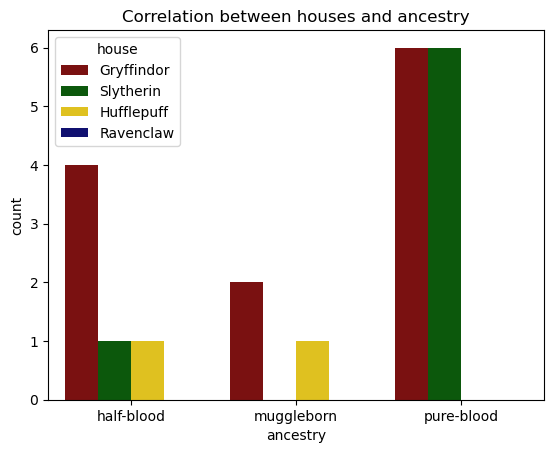

In [17]:
students = df[df["role"] == "Student"]

colors_houses = ["darkred", "darkgreen", "gold", "navy"]

sns.countplot(data = students, x = "ancestry", hue = "house", palette = colors_houses)

plt.title("Correlation between houses and ancestry")
plt.show()

## 4. Does size matter?

/Users/ilariazanoni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


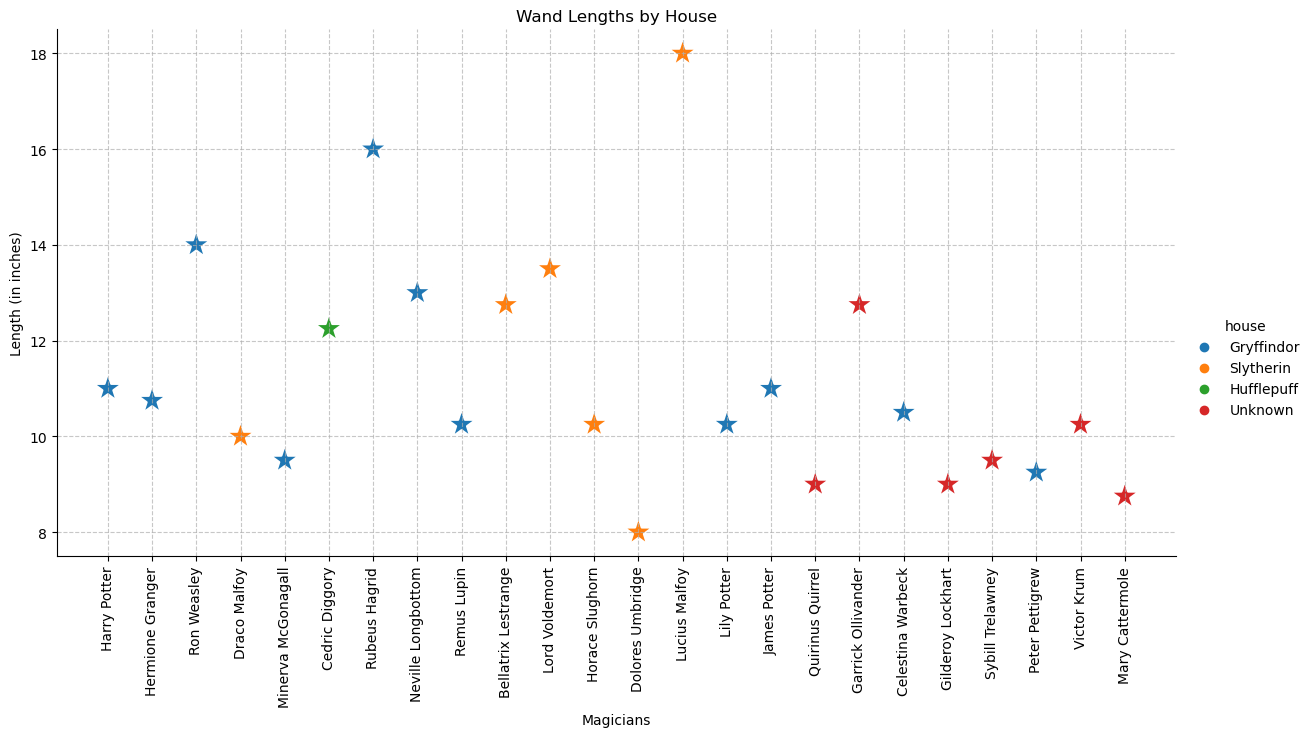

In [22]:
wands_subset = df[(df["wand_length"] > 0.00)]
df["house"].fillna("Unknown", inplace = True)

g = sns.relplot(data = wands_subset, x = "name", y = "wand_length",s = 500, hue = "house", kind = "scatter", height = 6, aspect = 2, marker = '*')
g.set_xticklabels(rotation = 90)

plt.title("Wand Lengths by House")
plt.xlabel("Magicians")
plt.ylabel("Length (in inches)")
plt.grid(True, axis = "both", linestyle = "--", alpha = 0.7)  # Add grid lines on both axessns.despine()
plt.show()



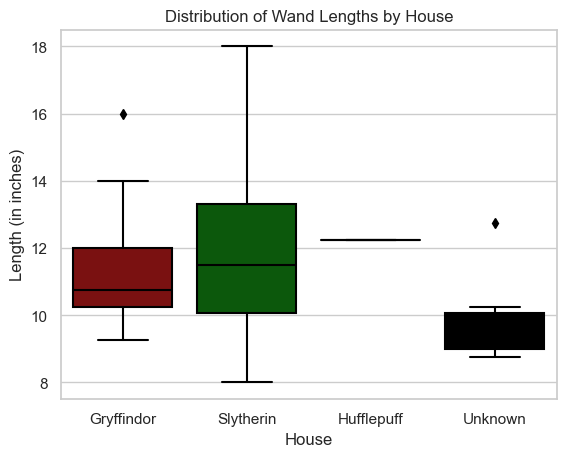

In [111]:
custom_palette = ["darkred", "darkgreen", "gold", "black"]

sns.boxplot(data=wands_subset, x = "house", y = "wand_length", palette = custom_palette)

plt.title("Distribution of Wand Lengths by House")
plt.xlabel("House")
plt.ylabel("Length (in inches)")
plt.show()


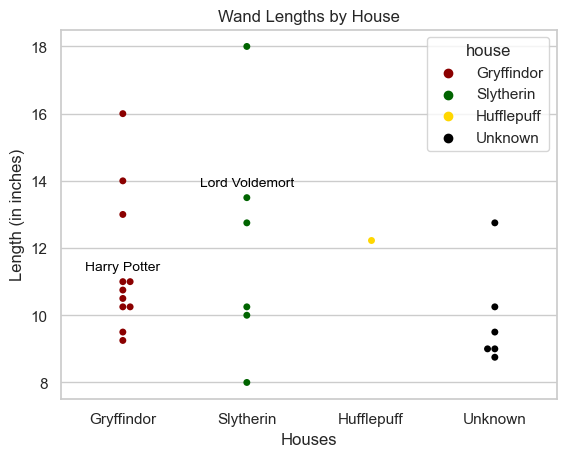

In [109]:
specific_names = ["Harry Potter", "Lord Voldemort"]

for name in specific_names:
    specific_point = wands_subset[wands_subset["name"] == name].iloc[0]
    plt.annotate(name, (specific_point.house, specific_point["wand_length"]),
                 textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10, color='black')

sns.set(style='whitegrid')
custom_palette = ["darkred", "darkgreen", "gold", "black"]
sns.swarmplot(data =wands_subset, x="house", y="wand_length", hue="house", palette = custom_palette)   

plt.title("Wand Lengths by House")
plt.xlabel("Houses")
plt.ylabel("Length (in inches)")
plt.show()

## Average length of the wands

In [137]:
avg = wands_subset["wand_length"].mean()
print(f"The average length of the wands is {avg}")

The average length of the wands is 11.229166666666666
